In [1]:
from random import seed
from random import random
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal
import pylab
import math
import seaborn as sns

In [2]:
class Automatos:
    def __init__(self, matriz, symbols):
        self.matriz = np.array(matriz)
        self.symb = symbols
    def deterministic(self, inter):
        p = []
        i = 0
        for k in range(inter):
            r = random()
            a = 0
            for j in range(len(self.matriz)):
                a = a + self.matriz[i][j]
                if r < a:
                    p.append(self.symb[i])
                    i = j
                    break
        return p
M = [[0.5,0.5,0,0],
    [0,0.1,0.9,0],
    [0,0,0.6,0.4],
    [0.7,0,0,0.3]
    ] 
auto = Automatos(M, [0,1,2,3])
padroes_fig2 = auto.deterministic(200)
#print(padroes_fig2)

In [3]:
#from numpy import arange
#plt.title("Bar Plot")
#plt.step(arange(0,len(padroes_fig2)),padroes_fig2, color = 'darkblue')
#plt.xlim(0,len(padroes_fig2))
#plt.show()

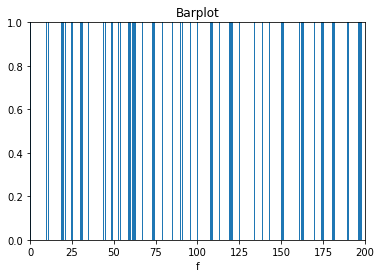

In [14]:
class split_signal:
    def __init__(self):
        self.list_zero = []
        self.list_one = []
        self.list_two = []
        self.list_three = []
    def split(self, lista):
        for i in range(len(lista)):
            if lista[i] == 0:
                self.list_zero.append(1)
            else:
                self.list_zero.append(0)
        for i in lista:
            if lista[i] == 1:
                self.list_one.append(1)
            else:
                self.list_one.append(0)
        for i in lista:
            if lista[i] == 2:
                self.list_two.append(1)
            else:
                self.list_two.append(0)
        for i in lista:
            if lista[i] == 3:
                self.list_three.append(1)
            else:
                self.list_three.append(0)   
        return self.list_zero
    #def plots(self):
        #plt.bar(len(self.list_zero), self.list_zero)
        #plt.show()
        #fig, axs = plt.subplots(4)
        #fig.suptitle('Split signals')
        #axs[0].plot(self.list_zero, len(self.list_zero))
        #axs[1].plot(self.list_one, len(self.list_one))
        #axs[2].plot(self.list_two, len(self.list_two))
        #axs[3].plot(self.list_three, len(self.list_three))
            
split_fig2 = split_signal()
hl = split_fig2.split(padroes_fig2)
#split_fig2.plots()

x = np.arange(200)
plt.bar(x, hl)
#plt.bar(x, carlos_padroes)
#plt.bar(x,pedro_padroes)

plt.title('Barplot')
plt.xlabel('f')
pylab.xlim(0,200)
pylab.ylim(0,1)

plt.show()